### Tutorial 0. Install

In [ ]:
!CUDA=cpu
!pip install --upgrade --force-reinstall torch-sparse -f https://pytorch-geometric.com/whl/torch-$TORCH+$CUDA.html
!pip install --upgrade --force-reinstall torch-cluster -f https://pytorch-geometric.com/whl/torch-$TORCH+$CUDA.html
!pip install --upgrade --force-reinstall torch-spline-conv -f https://pytorch-geometric.com/whl/torch-$TORCH+$CUDA.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-+.html
     |████████████████████████████████| 209 kB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 39.4 MB 14.9 MB/s eta 0:00:01    |██                              | 2.4 MB 12.5 MB/s eta 0:00:03
  Using cached numpy-2.0.2-cp39-cp39-macosx_10_9_x86_64.whl (21.2 MB)
anceled
ERROR: Operation cancelled by user
^C
Traceback (most recent call last):
  File "/Users/temporary/anaconda3/bin/pip", line 7, in <module>
    from pip._internal.cli.main import main
  File "/Users/temporary/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/Users/temporary/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/Users/temporary/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/main_parser.py", line 8, in <

In [1]:
!pip install e3nn

     |████████████████████████████████| 118 kB 9.5 MB/s eta 0:00:01


### Tutorial 1. Irreps

In [3]:
from e3nn.o3 import Irreps

In [4]:
irreps = Irreps("1o")
irreps

1x1o

In [5]:
# Tuple [Tuple[int, Tuple[int, int]]]

print(len(irreps))
mul_ir = irreps[0] # a tubple

print(mul_ir)
print(len(mul_ir))
mul = mul_ir[0] # an int
ir = mul_ir[1] # another tuple

print(mul)

print(ir)
# print(len(ir)) ir is a tuple of 2 ints but __len__ has been disabled since it is always 2
l = ir[0]
p = ir[1]

print(l, p)

1
1x1o
2
1
1o
1 -1


In [9]:
import torch
t = torch.tensor

# show the transformation matrix corresponding to the inversion
irreps.D_from_angles(alpha=t(0.0), beta = t(0.0), gamma = t(0.0), k = t(0))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [10]:
# a small rotation around the y axis
irreps.D_from_angles(alpha=t(0.1), beta = t(0.0), gamma = t(0.0), k = t(0))

tensor([[ 0.9950,  0.0000,  0.0998],
        [ 0.0000,  1.0000,  0.0000],
        [-0.0998,  0.0000,  0.9950]])

In [11]:
# the irreps tell us how 7 scalars, 3 pseudoscalars, 5 vectors and 5 odd representation of l=2 transforms. 
# They all transforms independently, this can be seen by visualizing the matrix
irreps = Irreps("7x0e + 3x0o + 5x1o + 5x2o")

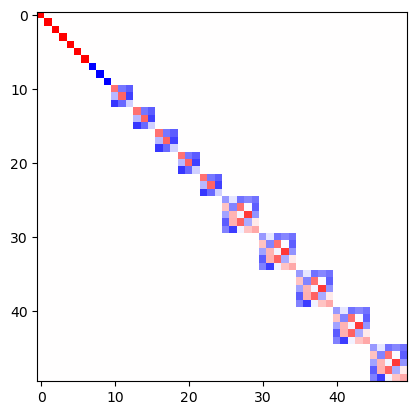

In [12]:
from e3nn import o3

rot = -o3.rand_matrix()

D = irreps.D_from_matrix(rot)

import matplotlib.pyplot as plt

plt.imshow(D, cmap = 'bwr', vmin = -1, vmax = 1)